<a href="https://colab.research.google.com/github/PavelMakhanov/pet-project/blob/streamlit/Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Парсинг данных

In [31]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import random
import time
import re

In [32]:
# HEADERS = {'User-Agent': 
#            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML,\
#             like Gecko) Chrome/108.0.0.0 YaBrowser/23.1.2.928 Yowser/2.5 Safari/537.36'}

In [33]:
# estate= pd.DataFrame()

In [34]:
# count = 1
# for i in range(1,100):

#   try:
#       time.sleep(random.randint(1, 4))

#       url_page = 'https://tvoyadres.ru/leningradskaya-oblast/sankt-peterburg/nedvizhimost/kvartiry/?page='+str(i)+'&region=77&city=842&object=2&'
#       res = requests.get(url_page, headers=HEADERS, timeout = 3)
#       soup = BeautifulSoup(res.text)

#       refs_page = refs_page = soup.findAll('a')

#       links_page = []

#       for ref in refs_page:
#           st = re.search('\S+\d{8}',ref.get('href'))
#           if st:
#             links_page.append('https://tvoyadres.ru'+st[0])
          
#       for link in links_page:
#         try:
          
#           time.sleep(random.randint(2, 5)) 
#           res_link = requests.get(link, headers=HEADERS, timeout = 3)
#           soup_link = BeautifulSoup(res_link.text)
#           dic = {}

#           price = int(soup_link.find(itemprop = 'price').get('content'))
#           geo_lat = float(soup_link.find(class_ = 'map small').get('data-coordinates').split(',')[0])
#           geo_lon = float(soup_link.find(class_ = 'map small').get('data-coordinates').split(',')[1])
#           building_type = soup_link.find(text = ['Панельный','Монолитный','Кирпичный','Блочный','Деревянный'])
          
#           for i,j in zip(soup_link.findAll(class_ = 'left'),soup_link.findAll(class_ = 'right')):
#               dic[i.text] = j.text
          
#           level = int(dic['Этаж'].split('/')[0])
#           levels = int(dic['Этаж'].split('/')[1])
#           try:
#               rooms = int(dic['Количество комнат'])
#           except:
#               rooms = 1   
#           area = int(dic['Площадь объекта'].split('/')[0])
#           try:
#               kitchen_area = int(dic['Площадь объекта'].split('/')[2].replace('м²',''))
#           except:
#               kitchen_area = int(dic['Площадь объекта'].split('/')[0])-int(dic['Площадь объекта'].split('/')[1].replace('м²','')) 
#           object_type = dic['Тип жилья'] 
#           date = dic['Дата публикации'].strip()

#           row = {'price': price, 'geo_lat': geo_lat, 'geo_lon':geo_lon, 'building_type': building_type,
#                  'level':level,'levels': levels, 'rooms': rooms, 'area': area,
#                  'kitchen_area': kitchen_area, 'object_type': object_type, 'date': date}
#           estate_rielty = pd.concat([estate_rielty, pd.DataFrame([row])])


#         except:
#            pass
#       count+=1
#       print(f'номер цикла: {count}, длина датафрейма: {len(estate_rielty)}')  

#   except:
#       pass

In [35]:
# estate.to_csv('estate.csv',index=False)

#Предобработка данных

In [36]:
import pandas as pd

In [37]:
estate = pd.read_csv('estate.csv')

In [38]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          994 non-null    int64  
 1   geo_lat        994 non-null    float64
 2   geo_lon        994 non-null    float64
 3   building_type  994 non-null    object 
 4   level          994 non-null    int64  
 5   levels         994 non-null    int64  
 6   rooms          994 non-null    int64  
 7   area           994 non-null    float64
 8   kitchen_area   994 non-null    float64
 9   object_type    994 non-null    object 
 10  date           994 non-null    object 
dtypes: float64(4), int64(4), object(3)
memory usage: 85.5+ KB


Пропуски отсутствуют, преобразуем даные типа object в числовой тип данных

In [39]:
estate['building_type'] = estate['building_type'].replace({'Другой':0,'Монолитный':2,'Кирпичный':3 })

In [40]:
estate['object_type'] = estate['object_type'].replace({'Вторичка':1, 'Новостройка':11})

In [41]:
estate['year'] = estate['date'].apply(lambda x: x.split()[2])

In [42]:
estate['month'] = estate['date'].apply(lambda x: x.split()[1])

In [43]:
estate['month'] = estate['month'].replace('Март',3)

In [44]:
estate = estate[['price', 'geo_lat', 'geo_lon', 'building_type', 'level', 'levels',
       'rooms', 'area', 'kitchen_area', 'object_type', 'year',
       'month']]

In [45]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          994 non-null    int64  
 1   geo_lat        994 non-null    float64
 2   geo_lon        994 non-null    float64
 3   building_type  994 non-null    int64  
 4   level          994 non-null    int64  
 5   levels         994 non-null    int64  
 6   rooms          994 non-null    int64  
 7   area           994 non-null    float64
 8   kitchen_area   994 non-null    float64
 9   object_type    994 non-null    int64  
 10  year           994 non-null    object 
 11  month          994 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 93.3+ KB


Посмотрим основные статистики

In [46]:
estate.describe()

,price,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,month
count,9.940000e+02,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.0
mean,1.577750e+07,60.006848,30.149278,2.001006,8.611670,11.804829,1.699195,55.870221,21.290744,9.993964,3.0
std,6.489160e+06,0.108523,0.253082,1.097006,5.530116,5.359779,0.640257,13.516700,9.522802,3.009546,0.0
min,7.250000e+06,59.895842,29.662643,0.000000,1.000000,6.000000,1.000000,35.000000,10.000000,1.000000,3.0
25%,1.321760e+07,59.898002,30.207702,2.000000,4.000000,6.000000,1.000000,47.000000,13.000000,11.000000,3.0
50%,1.405998e+07,60.004708,30.208547,2.000000,7.000000,12.000000,2.000000,51.000000,16.000000,11.000000,3.0
75%,1.922850e+07,60.031801,30.285433,3.000000,12.000000,12.000000,2.000000,60.000000,32.000000,11.000000,3.0
max,2.998790e+07,60.191738,30.465804,3.000000,20.000000,25.000000,3.000000,85.000000,34.000000,11.000000,3.0


Предположительно выбросы отсутствуют

#Анализ данных

In [47]:
import matplotlib.pyplot as plt

In [48]:
from warnings import filterwarnings
filterwarnings('ignore')

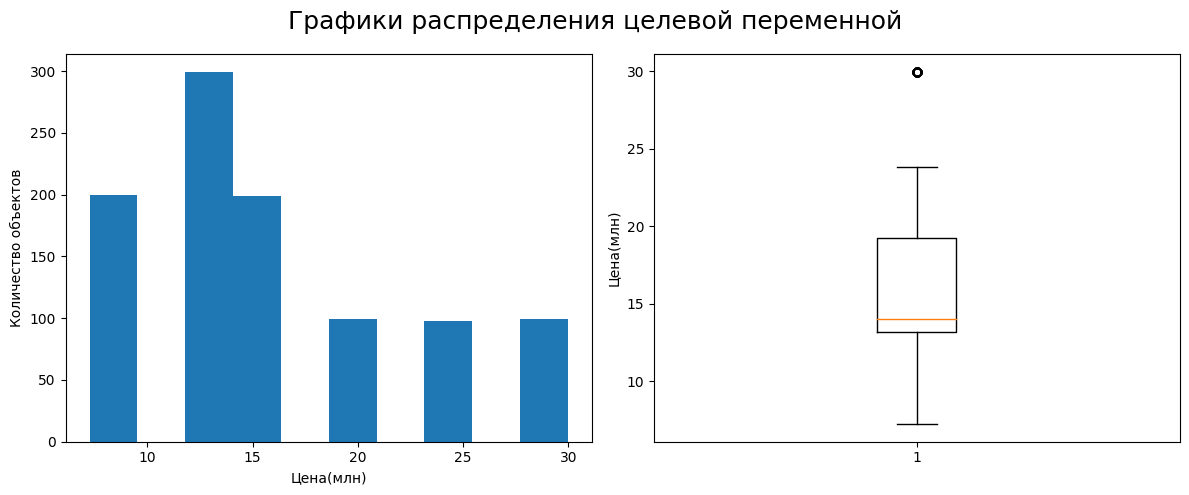

In [49]:
fig, axs = plt.subplots(1,2, figsize=(12,5), dpi = 100)
fig.suptitle('Графики распределения целевой переменной', fontsize=18)
axs[0].hist((estate['price']/1000000))
axs[0].set_xlabel('Цена(млн)')
axs[0].set_ylabel('Количество объектов')
axs[1].boxplot((estate['price']/1000000))
axs[1].set_ylabel('Цена(млн)')

fig.tight_layout()
plt.show()

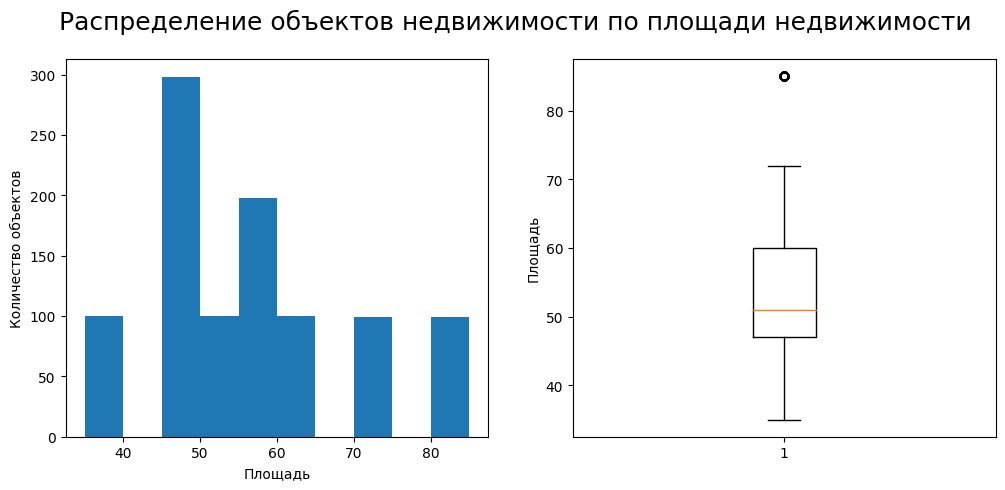

In [50]:
fig, axs = plt.subplots(1,2, figsize=(12,5), dpi = 100)
fig.suptitle('Распределение объектов недвижимости по площади недвижимости', fontsize=18)
axs[0].hist(estate['area'])
axs[0].set_xlabel('Площадь')
axs[0].set_ylabel('Количество объектов')
axs[1].boxplot(estate['area'])
axs[1].set_ylabel('Площадь')
plt.show()

Судя по графикам даннные имеют распределения отличные от нормального , судя по графикам боксплот есть объекты которые можно принять за выбросы, но они их значния в пределах реальных, поэтому их не нужно обрабатывать 

In [51]:
corr = estate.corr()
corr.style.background_gradient(cmap='coolwarm')

,price,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,month
price,1.000000,0.680588,-0.847629,-0.263008,-0.451663,-0.375248,0.432445,0.673769,-0.047547,0.439727,nan
geo_lat,0.680588,1.000000,-0.925505,-0.675244,0.072122,0.275603,-0.260851,-0.050629,-0.086831,0.006597,nan
geo_lon,-0.847629,-0.925505,1.000000,0.569597,0.141947,-0.054458,-0.062305,-0.231341,0.258143,-0.077246,nan
building_type,-0.263008,-0.675244,0.569597,1.000000,-0.481169,-0.701168,0.429136,0.271876,0.267578,0.610364,nan
level,-0.451663,0.072122,0.141947,-0.481169,1.000000,0.859406,-0.487530,-0.635846,-0.215261,-0.689089,nan
levels,-0.375248,0.275603,-0.054458,-0.701168,0.859406,1.000000,-0.572939,-0.690181,-0.327203,-0.823793,nan
rooms,0.432445,-0.260851,-0.062305,0.429136,-0.487530,-0.572939,1.000000,0.886033,-0.247601,0.365421,nan
area,0.673769,-0.050629,-0.231341,0.271876,-0.635846,-0.690181,0.886033,1.000000,0.061741,0.516662,nan
kitchen_area,-0.047547,-0.086831,0.258143,0.267578,-0.215261,-0.327203,-0.247601,0.061741,1.000000,0.396741,nan
object_type,0.439727,0.006597,-0.077246,0.610364,-0.689089,-0.823793,0.365421,0.516662,0.396741,1.000000,nan


Мультиколлениарность отсутствует

#Обучение модели 

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [53]:
y = estate['price']

In [54]:
X = estate.drop('price', axis=1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 1)

Для обучения возьмем ансабль решающих деревьев - RandomForest. Он является одним из самых популярных алгоритмов для решения задач регрессии из-за его простоты и высокой точности, и редко переобучается.

**Baseline Model**

In [56]:
rfr = RandomForestRegressor(random_state= 116)

Скор на тестовых данных

In [57]:
rfr.fit(X_train, y_train)
preds = rfr.predict(X_test)

In [58]:
print(f'R^2 score: {r2_score(y_test, preds):.3f}')
print(f'RMSE score: {mean_squared_error(y_test, preds, squared=False):.2f}')

R^2 score: 1.000
RMSE score: 7580.70


Скор на тренировочных данных

In [59]:
preds_tr = rfr.predict(X_train)
print(f'R^2 score: {r2_score(y_train, preds_tr):.3f}')
print(f'RMSE score: {mean_squared_error(y_train, preds_tr, squared=False):.2f}')

R^2 score: 1.000
RMSE score: 8068.74


Модель достаточно хорошо обучилась и ей не требуется оптимизация гиперпараметров

In [60]:
import joblib

In [61]:
joblib_file = "ml_rfr.pkl" 
joblib.dump(rfr, joblib_file)

['ml_rfr.pkl']

#Приложение streamlit

In [62]:
model = joblib.load("ml_rfr.pkl")

In [63]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 51.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [64]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
%%writefile app.py
import joblib
import datetime
import streamlit as st
from geopy.geocoders import Nominatim
import numpy as np

adress = st.text_input('Введите адрес.   Пример: Санкт-Петербург Фрунзе 25')

building_type = st.selectbox('Выберите тип здания', ['Монолитный','Кирпичный','Другой'])

level = st.slider('Этаж',min_value=1, max_value=50)

levels = st.slider('Всего этажей',min_value=1, max_value=50)

rooms = st.selectbox('Количество комнат', [1,2,3,4,5])

area = st.slider('Площадь',min_value=1, max_value=100)

kitchen_area = st.slider('Площадь кухни',min_value=1, max_value=50)

object_type = st.selectbox('Тип жилья', ['Новостройка','Вторичка'])

date = datetime.datetime.now()

month = date.month

year = date.year

geolocator = Nominatim(user_agent="my_request")
location = geolocator.geocode(adress)

if building_type == 'Монолитный':
  building_type = 2
elif building_type == 'Кирпичный':
  building_type = 3
else:
  building_type = 0

if object_type == 'Новостройка':
  object_type = 11
else:
  object_type = 1  

model = joblib.load("ml_rfr.pkl")
  

if st.button('Рассчитать стоимость'):
    geo_lat = location.latitude 
    geo_lon = location.longitude
    prediction_inp = np.array([geo_lat,geo_lon,building_type,level,levels,\
                 rooms,area,kitchen_area,object_type,month,year])
    cost = model.predict(prediction_inp.reshape(1, -1))
    st.write(f'### Приблизительная cтоимость жилья:\n ## {int(cost)}')


Overwriting app.py


In [66]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.979s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [70]:
!streamlit run /content/app.py &>/content/logs.txt &

In [71]:
!npx localtunnel --port 8501

npx: installed 22 in 2.247s
your url is: https://large-cases-call-35-196-59-216.loca.lt
^C
